In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "CatsVSDogsCNN64x2{}".format(int(time.time()))

tensorboard = Tensorboard(Logdir='logs/{}'.format(NAME))

x=np.load('features.npy')
y=np.load('labels.npy')

x=x/255



In [13]:
print(len(x))

24946


In [16]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# categorical works too
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=['accuracy'])

model.fit(x,y, batch_size=32, epochs=10, validation_split=0.1)


Epoch 1/10
702/702 [==============================] - 69s 97ms/step - loss: 0.6555 - accuracy: 0.5998 - val_loss: 0.5620 - val_accuracy: 0.7054
Epoch 2/10
702/702 [==============================] - 70s 100ms/step - loss: 0.5202 - accuracy: 0.7427 - val_loss: 0.5525 - val_accuracy: 0.7226
Epoch 3/10
702/702 [==============================] - 70s 100ms/step - loss: 0.4686 - accuracy: 0.7752 - val_loss: 0.5170 - val_accuracy: 0.7519
Epoch 4/10
702/702 [==============================] - 70s 100ms/step - loss: 0.4300 - accuracy: 0.7990 - val_loss: 0.4990 - val_accuracy: 0.7619
Epoch 5/10
702/702 [==============================] - 75s 107ms/step - loss: 0.3839 - accuracy: 0.8249 - val_loss: 0.5283 - val_accuracy: 0.7487
Epoch 6/10
702/702 [==============================] - 70s 99ms/step - loss: 0.3493 - accuracy: 0.8445 - val_loss: 0.4990 - val_accuracy: 0.7659
Epoch 7/10
702/702 [==============================] - 68s 97ms/step - loss: 0.2983 - accuracy: 0.8724 - val_loss: 0.5271 - val_accur

In [18]:
val_loss, val_acc = model.evaluate(x,y)
print(val_loss, val_acc)

780/780 [==============================] - 15s 20ms/step - loss: 0.1666 - accuracy: 0.94400s - loss: 0.1614 - accuracy
0.16655303537845612 0.9439990520477295


In [19]:
#model.save('cat_dog_classifier.model')

INFO:tensorflow:Assets written to: cat_dog_classifier.model\assets


In [20]:
new_model = tf.keras.models.load_model('cat_dog_classifier.model')

predictions = new_model.predict([x])


In [86]:
i=12

In [87]:
print(predictions[i])

[0.01388901]


In [88]:
#import matplotlib.pyplot as plt
#import cv2

In [89]:
test = x[i]
test = cv2.resize(test, (50, 50))
print(test.shape)


(50, 50)


0


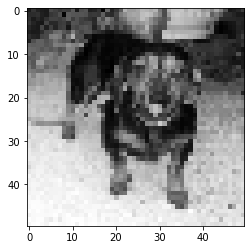

In [90]:
print(y[i])
plt.imshow(test, cmap = "gray")
plt.show()